## Observations and Insights 

From the Analysis we can conclude the following:
1. Infubinol  has a much higher outlier than Capomulin, Certamin & Ramicane.
2. Males & Female mice are pretty evenly distributed
3. Capomulin & Ramicane are the most common treatments for mice. 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df = pd.merge(study_results, mouse_metadata, on=["Mouse ID", "Mouse ID"], how='left')

# Display the data table for preview
merge_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
print(merge_df["Mouse ID"].nunique())

249


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate = merge_df[merge_df.duplicated(['Mouse ID', 'Timepoint'], keep=False)]
duplicate

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
noduplicates_df = merge_df.loc[merge_df['Mouse ID'] != 'g989']
noduplicates_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [5]:
# Checking the number of mice in the clean DataFrame.
print(noduplicates_df['Mouse ID'].nunique())

248


## Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
noduplicates_gbdf = noduplicates_df.groupby("Drug Regimen")
noduplicates_gbdf
summary_statistics = pd.DataFrame({"Tumor Volume Mean": noduplicates_gbdf["Tumor Volume (mm3)"].mean(),
                                  "Tumor Volume Median": noduplicates_gbdf["Tumor Volume (mm3)"].median(),
                                  "Tumor Volume Variance": noduplicates_gbdf["Tumor Volume (mm3)"].var(),
                                  "Tumor Volume Standard Deviation": noduplicates_gbdf["Tumor Volume (mm3)"].std(),
                                   "Tumor Volume SEM": noduplicates_gbdf["Tumor Volume (mm3)"].sem(),
                                  })
summary_statistics

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_agg = noduplicates_df.groupby("Drug Regimen").agg(
    {"Tumor Volume (mm3)":['mean', 'median', 'var', 'std', 'sem']
    })
noduplicates_gbdf
summary_agg.head()

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466

## Bar and Pie Charts

Text(0, 0.5, 'Number of Data Points')

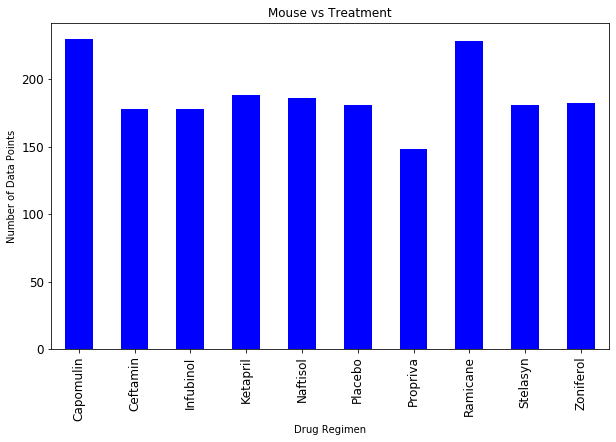

In [8]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
mouse_count = noduplicates_gbdf["Mouse ID"].count()
bar_plt = mouse_count.plot(kind='bar', figsize=(10,6), color="blue", fontsize=12);
bar_plt.set_title("Mouse vs Treatment")
bar_plt.set_xlabel("Drug Regimen")
bar_plt.set_ylabel("Number of Data Points")

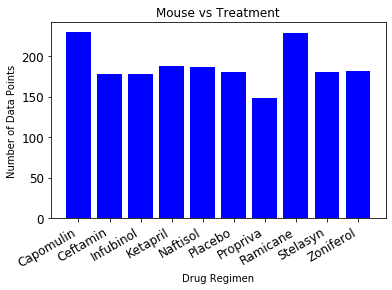

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
fig, bar_plt= plt.subplots()
bar_plt.bar(mouse_count.index.values, mouse_count.values, color="blue")
plt.title("Mouse vs Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.xticks(size=12)
plt.yticks(size=12)
fig.autofmt_xdate()

Text(0, 0.5, 'Sex')

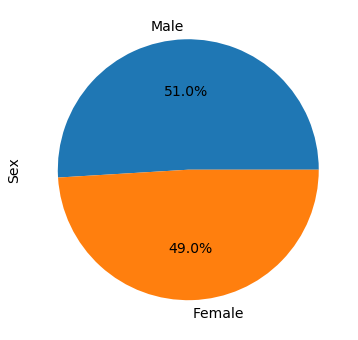

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_df = noduplicates_df["Sex"].value_counts()
pie_plot = gender_df.plot(kind='pie', figsize=(10,6), fontsize=14, autopct='%1.1f%%');
pie_plot.set_ylabel("Sex", size=14)

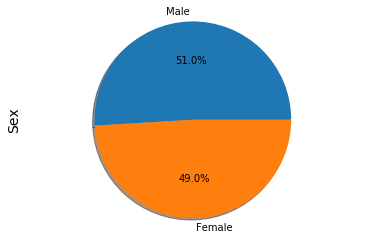

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(gender_df,autopct="%1.1f%%", labels=gender_df.index.values, shadow=True)
plt.axis("equal")
plt.ylabel("Sex", size=14)
plt.xticks(size = 14)
plt.yticks(size = 14)
plt.show()

## Quartiles, Outliers and Boxplots

In [12]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
final_df = noduplicates_df.groupby("Mouse ID").max()["Timepoint"]
final_merge = pd.merge(final_df, noduplicates_df, on=("Mouse ID", "Timepoint"), how="left")
final_merge.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [13]:
# Put treatments into a list for for loop (and later for plot labels)
drug_list = ["Capomulin", "Ramicane", "Infubinol", "Certamin"]

# Create empty list to fill with tumor vol data (for plotting)
volume_list = {}
list = []

# Loop thru treatments
for drug in drug_list:
    print(drug)
    volume_list[drug] = final_merge.loc[(final_merge["Drug Regimen"] == drug)]["Tumor Volume (mm3)"]
    print(volume_list[drug])
    list.append(final_merge.loc[(final_merge["Drug Regimen"] == drug)]["Tumor Volume (mm3)"])

# Calculate the IQR and quantitatively determine if there are any potential outliers
    quartiles = volume_list[drug].quantile([.25,.5,.75])
    lowerquartile = quartiles[0.25]
    upperquartile = quartiles[0.75]
    interquartile = upperquartile-lowerquartile

# Identify Outliers
    print(f"The lower quartile of {drug} is: {lowerquartile} and the upper quartile of {drug} is: {upperquartile}")
    print(f"The interquartile range of {drug} is: {interquartile} and the median of {drug} is: {quartiles[0.5]}")
      
    lower_bound = lowerquartile - (1.5*interquartile)
    upper_bound = upperquartile - (1.5*interquartile)
    print(f"For {drug}, values below {lower_bound} and values above {upper_bound} could be outliers.")
    print("\n")

Capomulin
19     38.982878
24     38.939633
61     30.485985
64     37.074024
66     40.159220
80     47.685963
83     37.311846
85     38.125164
87     38.753265
108    41.483008
115    38.846876
121    28.430964
124    33.329098
162    46.539206
163    32.377357
169    41.581521
174    23.343598
180    40.728578
183    34.455298
192    31.023923
204    40.658124
208    39.952347
220    36.041047
226    28.484033
239    31.896238
Name: Tumor Volume (mm3), dtype: float64
The lower quartile of Capomulin is: 32.37735684 and the upper quartile of Capomulin is: 40.1592203
The interquartile range of Capomulin is: 7.781863460000004 and the median of Capomulin is: 38.125164399999996
For Capomulin, values below 20.70456164999999 and values above 28.486425109999995 could be outliers.


Ramicane
6      38.407618
7      43.047543
10     38.810366
12     32.978522
33     38.342008
37     33.397653
45     37.311236
52     40.659006
70     29.128472
76     33.562402
77     36.374510
91     31.560470

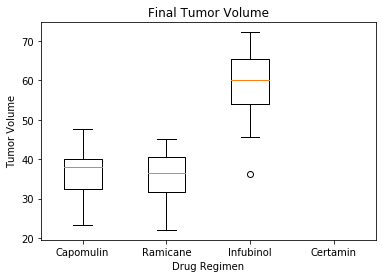

In [14]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, axl = plt.subplots()
axl.set_title('Final Tumor Volume')
axl.set_xlabel('Drug Regimen')
axl.set_ylabel('Tumor Volume')

axl.boxplot(list, labels=drug_list)
plt.savefig('Final Tumor Volume')
plt.show()

## Line and Scatter Plots

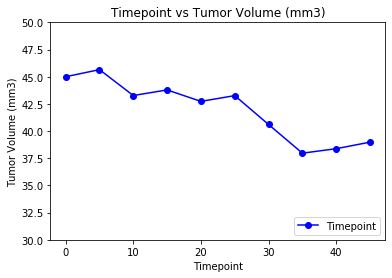

In [15]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
Capomulin_lineplot = noduplicates_df.loc[(noduplicates_df["Mouse ID"] == "b128") & (noduplicates_df["Drug Regimen"] == "Capomulin"), ["Timepoint","Tumor Volume (mm3)"]]
plt.hlines (0, 0, 40, alpha=0.5)
plt.ylim(30, 50)
plt.title("Timepoint vs Tumor Volume (mm3)")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.plot(Capomulin_lineplot["Timepoint"], Capomulin_lineplot["Tumor Volume (mm3)"], marker="o", color='blue', label="Timepoint")
plt.legend(loc="lower right")
plt.show()

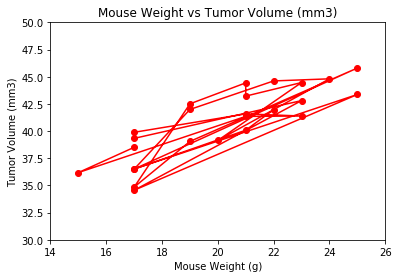

In [16]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_scatterplot = noduplicates_df.loc[(noduplicates_df["Drug Regimen"] == "Capomulin"), ['Mouse ID', "Weight (g)", "Tumor Volume (mm3)"]]
capomulin_scatterplot_gp = capomulin_scatterplot.groupby(["Mouse ID"]).mean()
plt.hlines (0, 0, 26, alpha=0.25) 
plt.xlim(capomulin_scatterplot_gp["Weight (g)"].min() - 1, capomulin_scatterplot_gp["Weight (g)"].max() + 1)
plt.ylim(30, 50)
plt.title("Timepoint vs Tumor Volume (mm3)")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")

plt.title("Mouse Weight vs Tumor Volume (mm3)")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.plot(capomulin_scatterplot_gp["Weight (g)"], capomulin_scatterplot_gp["Tumor Volume (mm3)"], marker="o", color="red")
plt.show()

## Correlation and Regression

The r-squared is: 0.7088568047708717


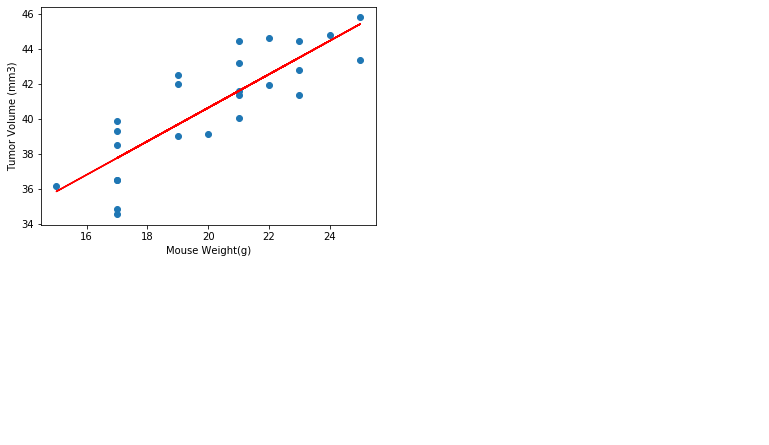

In [17]:
# Calculate the correlation coefficient and linear regression model 
x_values = capomulin_scatterplot_gp["Weight (g)"]
y_values = capomulin_scatterplot_gp["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regression_values = x_values * slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regression_values, "r-")
plt.annotate(line_equation,(34,22),fontsize=14,color="red")
plt.xlabel('Mouse Weight(g)')
plt.ylabel('Tumor Volume (mm3)')
print(f"The r-squared is: {rvalue**2}")
plt.show()